<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Ensemble/RandomForests/How_Feature_Importance_Is_Calculated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier


In [3]:
X, y = make_classification(n_samples=5, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [4]:
clf = DecisionTreeClassifier()

In [5]:
clf.fit(X, y)

DecisionTreeClassifier()

In [6]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [7]:
X.shape

(5, 2)

In [8]:
y

array([0, 1, 0, 1, 0])

In [9]:
import numpy as np


In [10]:
np.concatenate((X, y.reshape(5, 1)), axis=1)

array([[ 0.96399434, -0.12399406,  0.        ],
       [ 1.05699092,  0.69448021,  1.        ],
       [-0.55744457,  0.08369352,  0.        ],
       [-1.19224399, -1.66447018,  1.        ],
       [-0.3874711 ,  1.38366234,  0.        ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


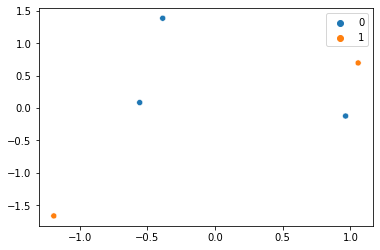

In [11]:
import seaborn as sns
sns.scatterplot(X[:][:,0], X[:][:,1], hue=y)

In [12]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

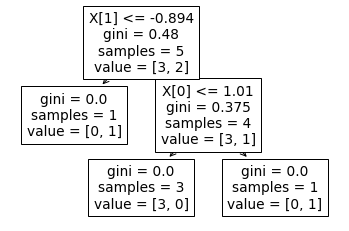

In [13]:
plot_tree(clf)

In [14]:
clf.feature_importances_

array([0.625, 0.375])

Since feature importances are normalized, sum of all feature importance is 1.

# Feature Importance Formula.



# Node importance:
$$n_i = { \frac{N_T} {N}} [impurity - ( \frac{N_Tr}{N_T} \times impurity_R) - (\frac{N_Tl}{N_T} \times impurity_L)].$$

$$n_i = node\:importance$$
$$ N_T = no.\:of\:rows\:in\:that\:node.$$
$$N = total\:no.\:of\:rows\:in\:data.$$
$$impurity = impurity\:on\:node(gini)$$
$$N_TR = no.\:of\:rows\:of\:right\:child$$
$$N_TL = no\:of\:rows\:of\:left\:child.$$
$$impurity_L\:and\: impurity_R\: are\: impurity\:of\:left\:and\:right\:child\:respectively.$$

# Feature importance

$$f_{ik} = \frac{\sum_{j\in\: node\:split\:on\:feature\:k}\:x_i}{\sum_{j\in \:all\:nodes}\:x_i}$$

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [17]:
rf.feature_importances_

array([0.44444444, 0.55555556])

In [22]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)


[0. 0.]
[0.44444444 0.55555556]


In random forests, feature importance of a feature is average of all same feature's importances from different decision trees used as base models

In [19]:
X,y = make_classification(n_samples=15, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.875, 'X[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.625, 'X[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= -0.278\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

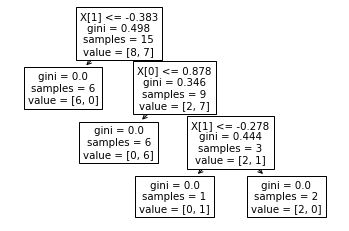

In [20]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [21]:
clf.feature_importances_

array([0.23809524, 0.76190476])

### If our data has high cardianality, we should use `sklearn.inspection.permutation_importance`. This gives better results.